In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train ) ,(x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape


(60000, 28, 28)

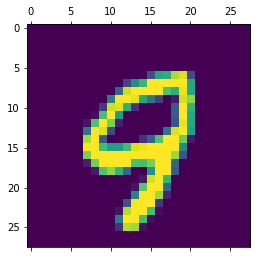

In [6]:
plt.matshow(x_train[42069])

In [7]:
y_train[42069]

9

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
x_train = x_train / 255
x_test = x_test /255

In [10]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [11]:
x_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
x_train_flatten.shape

(60000, 784)

In [13]:
len(x_train_flatten)

60000

In [14]:
x_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,),activation ='sigmoid')]) 
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 825us/step - loss: 0.4677 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 2s 824us/step - loss: 0.3031 - accuracy: 0.9158
Epoch 3/5
1458/1875 [======================>.......] - ETA: 0s - loss: 0.2839 - accuracy: 0.9209

In [18]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2642 - accuracy: 0.9262


[0.2641768753528595, 0.9261999726295471]

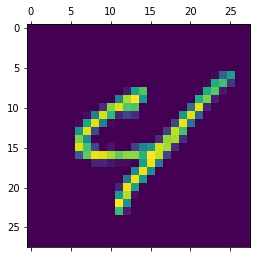

In [19]:
plt.matshow(x_test[420])

In [20]:
y_predicted = model.predict(x_test_flatten)
y_predicted[420] 
np.argmax(y_predicted[420])

313/313 [==============================] - 1s 2ms/step


4

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    3,    1,    0,    5,    8,    4,    3,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,    9,  928,   15,    7,    4,   12,   11,   38,    5],
       [   2,    0,   23,  917,    1,   25,    2,   10,   21,    9],
       [   1,    1,    4,    1,  903,    0,   10,    4,    9,   49],
       [   7,    3,    3,   28,   10,  779,   15,    9,   30,    8],
       [   9,    3,    5,    1,    7,   13,  915,    2,    3,    0],
       [   1,    6,   22,    5,    5,    0,    0,  954,    1,   34],
       [   5,   11,    5,   19,    9,   25,    9,   13,  868,   10],
       [   9,    7,    2,    8,   23,    6,    0,   23,    6,  925]])>

Text(69.0, 0.5, 'truth')

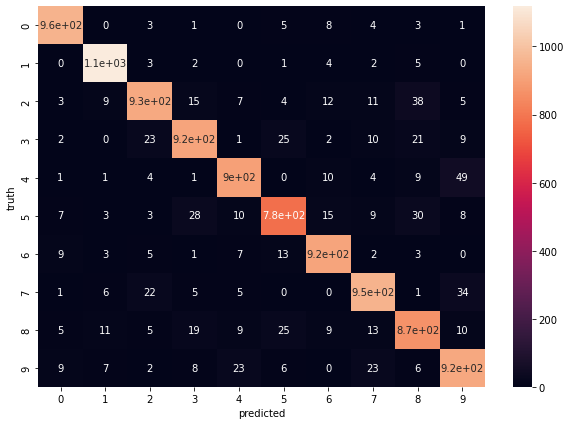

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')